In [1]:
%matplotlib inline

Let's start by loading a local MOC and plotting it

In [ ]:
from mocpy import MOC
import pyfits as pf
from matplotlib import pyplot as plt
path = '/home/carnero/dropbox_work/eboss/bright_mask/wise/v6/'
stars = pf.open(path + 'lrgv591_lrg_clean.fits')[1].data
ra = stars.field('plug_ra')
dec = stars.field('plug_dec')
import healpy as hp
moc = MOC()
m1 = moc.from_file('IR_BSM_v6_order17.moc')
#print m1.sky_fraction
print 41253.*m1.sky_fraction


'''
if m1.max_order>12:
    plotted_moc = m1.degrade_to_order(10)
else:
    plotted_moc = m1
            
m = {} # partial HEALPix map
for val in plotted_moc.best_res_pixels_iterator():
    m[val] = 1
        
        # ensure the map is at the correct nside
max_ipix = hp.nside2npix(2 ** plotted_moc.max_order) - 1
if not max_ipix in m:
    m[max_ipix] = hp.pixelfunc.UNSEEN
plt.figure() 


hp.cartview(m, nest=True, title='test', lonra=[-80.,0.], latra=[15.,30.])
#hp.mollview(m, nest=True, title='test')

hp.graticule()
hp.projplot(ra,dec,'.')
plt.show()
#m1.plot(title='test', coord='C')
'''


Now, we load MOC for GALEX GR6 AIS FUV:

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


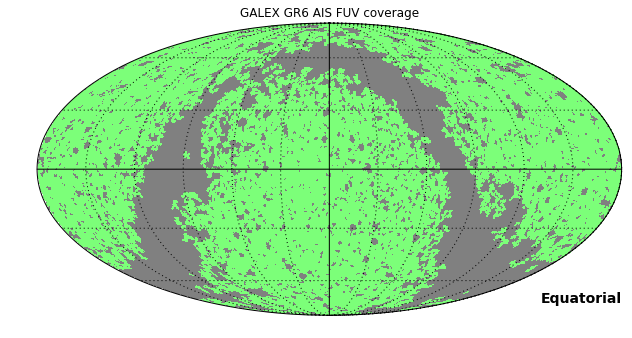

In [3]:
m2 = MOC.from_file('demo-data/P-GALEXGR6-AIS-FUV.fits')
m2.plot(title='GALEX GR6 AIS FUV coverage')

We can compute the intersection between the 2 MOC:

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


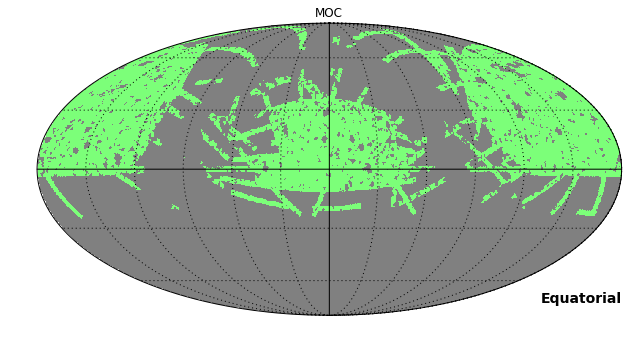

In [4]:
m_intersect = m1.intersection(m2)
m_intersect.plot()

And save the result in FITS (official serialization):

In [6]:
m_intersect.write('SDSS_inter_GALEX.fits')

MOC can also be saved in JSON:

In [7]:
m_intersect.write('SDSS_inter_GALEX.json', format='json')